# Download Input Data at the link below and save it to ./data/

# Process Numeric data for use in models

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Numeric Data

In [5]:
# We have to use float for now because int cannot accept NaN
num_data = pd.read_csv('./data/numeric_features.csv', low_memory=False, dtype=float)
print (num_data.columns)
num_data = num_data.drop('Unnamed: 0', axis=1)
num_data['id'] = num_data['id'].astype(int).astype("category")

num_data = num_data.drop('host_total_listings_count', axis=1)

print (num_data.shape)
num_data.sample()

Index(['Unnamed: 0', 'id', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'guests_included', 'host_listings_count', 'host_total_listings_count',
       'host_acceptance_rate', 'host_response_rate'],
      dtype='object')
(243721, 9)


,id,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate
74684,3960476,2.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN


# Load Bool Data

In [6]:
bool_data = pd.read_csv('./data/bool_features.csv', low_memory=False, dtype=int)
print (bool_data.columns)

bool_data = bool_data.drop('Unnamed: 0', axis=1)
bool_data['id'] = bool_data['id'].astype(int).astype("category")

bool_data.host_has_profile_pic = bool_data.host_has_profile_pic.astype(bool)
bool_data.host_identity_verified = bool_data.host_identity_verified.astype(bool)

print (bool_data.shape)


Index(['Unnamed: 0', 'id', 'host_has_profile_pic', 'host_identity_verified'], dtype='object')
(243721, 3)


# Load Date Data

In [7]:
parse_dates = ['host_since', 'last_scraped', 'days_delta']
date_data = pd.read_csv('./data/date_features.csv', low_memory=False, parse_dates=parse_dates)
print (date_data.columns)


date_data = date_data.drop('Unnamed: 0', axis=1)
date_data['id'] = date_data['id'].astype(int).astype("category")
date_data.days_delta = date_data.days_delta.apply(lambda x: x.split(' ')[0]).astype(float)

print (date_data.shape)
date_data.sample()

Index(['Unnamed: 0', 'id', 'host_since', 'last_scraped', 'days_delta'], dtype='object')
(243721, 4)


,id,host_since,last_scraped,days_delta
150032,19121342,2013-03-04,2017-09-02,1643.0


# Load Reviews Data (Dependent variable)

In [8]:
reviews_data = pd.read_csv('./data/reviews_features.csv', low_memory=False, dtype=float)
print (reviews_data.columns)

reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data['id'] = reviews_data['id'].astype(int).astype("category")
print (reviews_data.shape)
reviews_data.sample()

Index(['Unnamed: 0', 'id', 'number_of_reviews', 'review_scores_rating',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')
(243721, 5)


,id,number_of_reviews,review_scores_rating,review_scores_value,reviews_per_month
2530,7035672,40.0,99.0,10.0,2.33


# Get Random Sample for use in EDA

In [9]:
# Select a random sample for in EDA
import numpy as np

np.random.seed(1234)
sample_size=5000
idxs = np.random.randint(0, num_data.shape[0], sample_size)
idxs

array([224047, 189139, 165158, ..., 198969, 190231,   2508])

# Select Dependent Variable

Also, let's drop missing values from our dependent variable.
And let's drop the Id column.

In [10]:
# Set the dependent variable 
dependent_variable = 'review_scores_rating'

# Select the independent variables and get a combined dataset
data = pd.concat([num_data.loc[idxs], 
                  bool_data.loc[idxs][['host_has_profile_pic', 'host_identity_verified']], 
                  date_data.loc[idxs][['days_delta']], 
                  reviews_data.loc[idxs][['reviews_per_month', dependent_variable]]], axis=1)

# Drop Id column for now
data = data.drop('id', axis=1)

print (data.shape)
print (data.columns)

# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])

data.sample(1)

(5000, 13)
Index(['bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included',
       'host_listings_count', 'host_acceptance_rate', 'host_response_rate',
       'host_has_profile_pic', 'host_identity_verified', 'days_delta',
       'reviews_per_month', 'review_scores_rating'],
      dtype='object')


,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate,host_has_profile_pic,host_identity_verified,days_delta,reviews_per_month,review_scores_rating
18746,2.0,2.0,2.0,100.0,4.0,1.0,1.0,1.0,True,True,90.0,0.94,100.0


# Histogram of each dependent variable

bathrooms


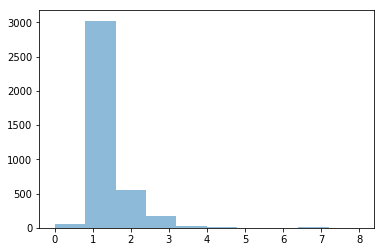

bedrooms


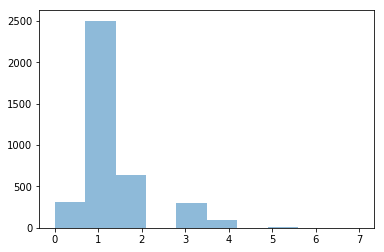

beds


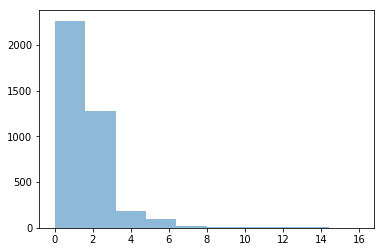

cleaning_fee


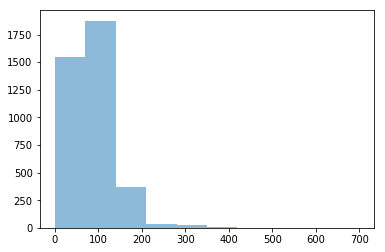

guests_included


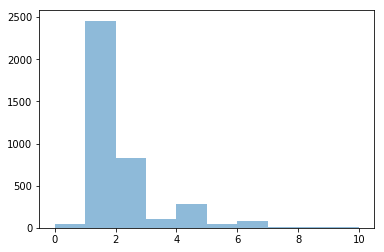

host_listings_count


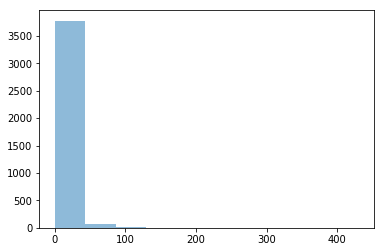

host_acceptance_rate


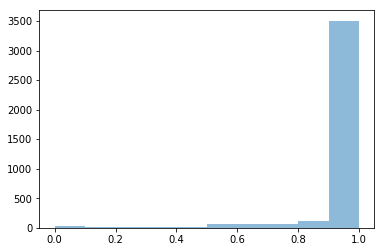

host_response_rate


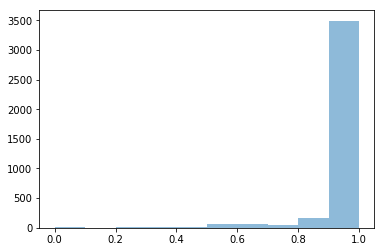

host_has_profile_pic


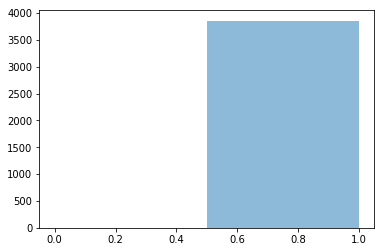

host_identity_verified


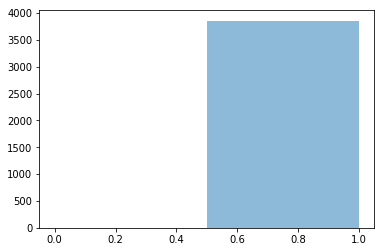

days_delta


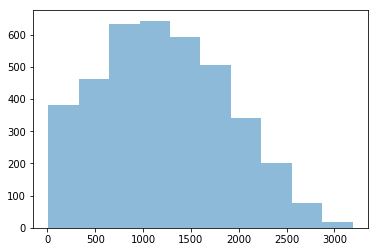

reviews_per_month


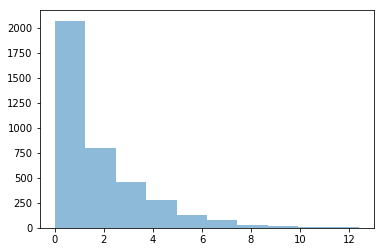

review_scores_rating


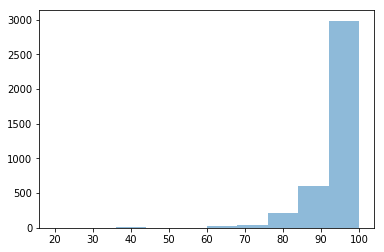

In [12]:
import matplotlib.pyplot as plt
for c in data.columns:
    if 'id' != c:
        print (c)
        lst = list(data[c].fillna(data[c].median()))
        
        b = 10
        if data[c].dtype == 'bool':
            b = 2
        plt.hist(lst, bins=b, alpha=0.5)
        plt.show()

# Try some transformations on the Independent Variables

exp


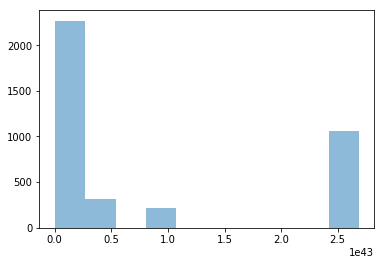

identity


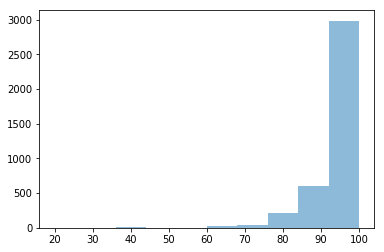

log


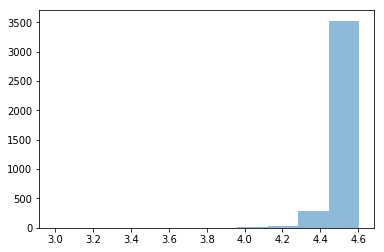

sqrt


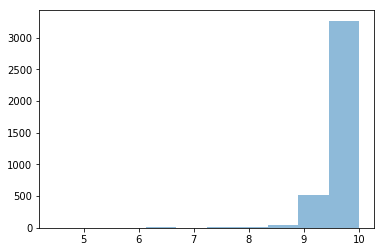

standard_scale


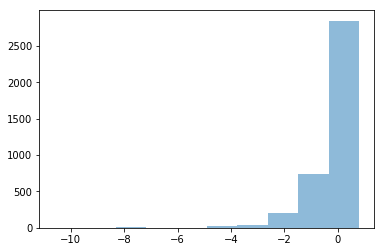

x^1/4


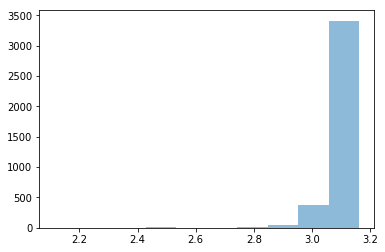

In [36]:
y_vals = data[dependent_variable].fillna(data[dependent_variable].median())
func_dict = {
    'identity': lambda x: x, 
    'sqrt': np.sqrt, 
    'log': np.log, 
    'exp': np.exp, 
    'x^1/4': lambda x: [i**(1./4) for i in x],
    'standard_scale': lambda x: [(i - np.mean(x)) / np.std(x) for i in x],
}

for k in sorted(func_dict.keys()):
    print k
    plt.hist(func_dict[k](y_vals), alpha=0.5)
    plt.show()


Nothing useful here.

# Scatter plot independent variable by each dependent variable

bathrooms


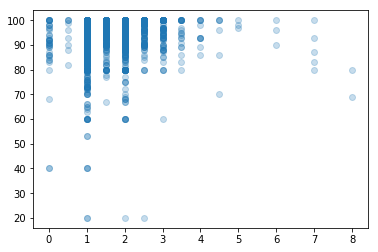

bedrooms


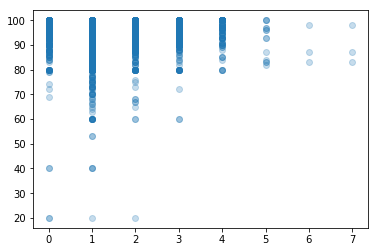

beds


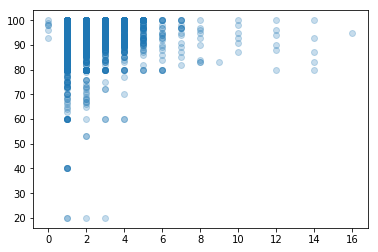

cleaning_fee


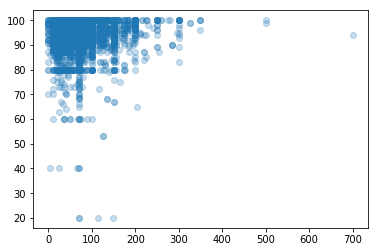

guests_included


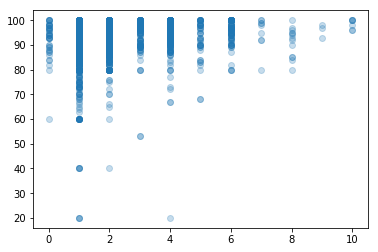

host_listings_count


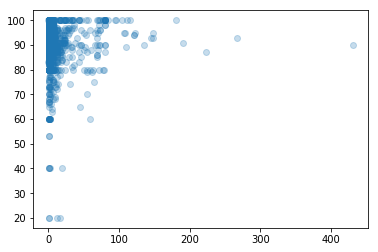

host_acceptance_rate


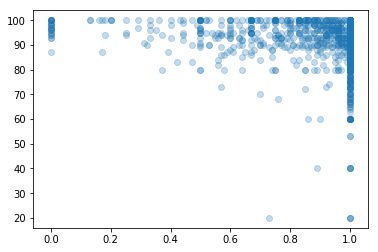

host_response_rate


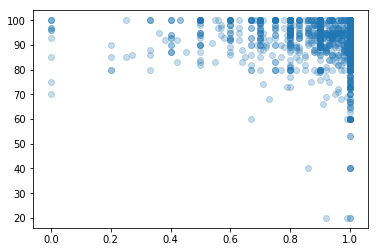

host_has_profile_pic


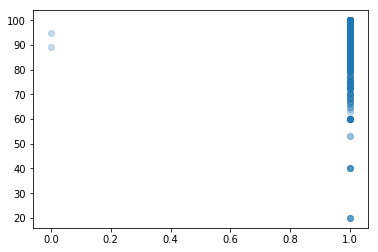

host_identity_verified


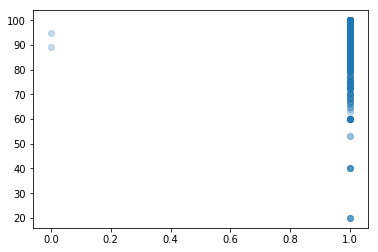

days_delta


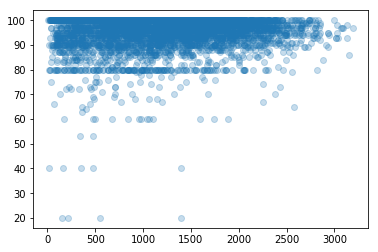

reviews_per_month


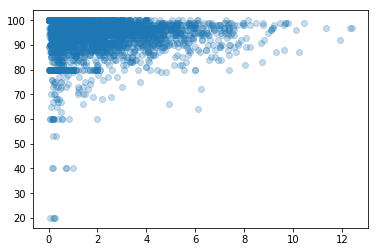

In [13]:
y_vals = data[dependent_variable].fillna(data[dependent_variable].median())
for c in data.columns:
    if c not in ['id', dependent_variable]:
        print (c)
        lst = list(data[c].fillna(np.nanmedian(data[c])))
        plt.scatter(lst, y_vals, alpha=0.25)
        plt.show()

# Takeaways
1. Remove 'bathrooms' >= 5
2. Remove 'bedrooms' > 5
3. Remove 'beds' >= 8
4. Remove 'cleaning_fee' >= 400
5. Remove 'guests_included' > 8
6. Remove 'host_listings_count' > 100
7. Remove 'host_acceptance_rate' == 0.
8. Remove 'host_response_rate' == 0.
9. Remove 'reviews_per_month' > 12.
10. Drop 'host_has_profile_pic'
11. Drop 'host_identity_verified'

# Scatter plot Independent variable vs. various transformations for Dependent variable

Independent variable: bathrooms, Transrormation: exp


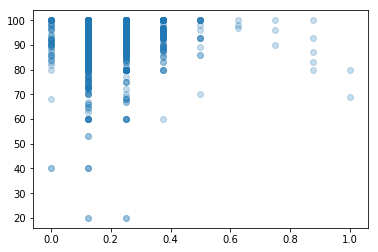

Independent variable: bathrooms, Transrormation: identity


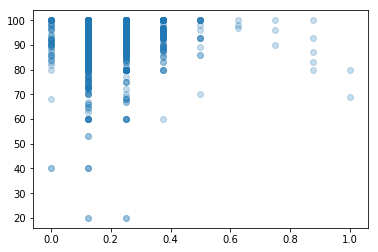

Independent variable: bathrooms, Transrormation: log


/Users/aysa.fan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


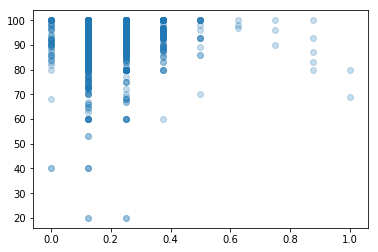

Independent variable: bathrooms, Transrormation: sqrt


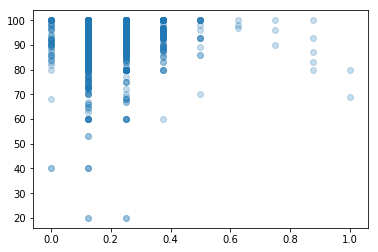

Independent variable: bedrooms, Transrormation: exp


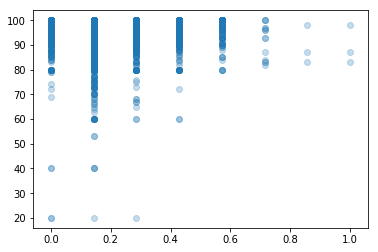

Independent variable: bedrooms, Transrormation: identity


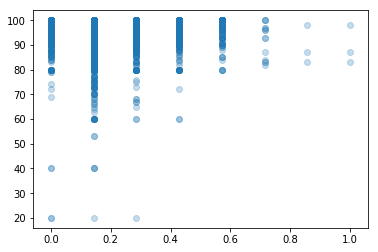

Independent variable: bedrooms, Transrormation: log


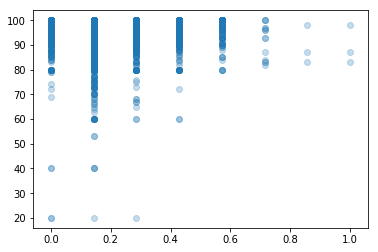

Independent variable: bedrooms, Transrormation: sqrt


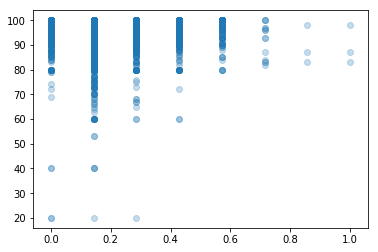

Independent variable: beds, Transrormation: exp


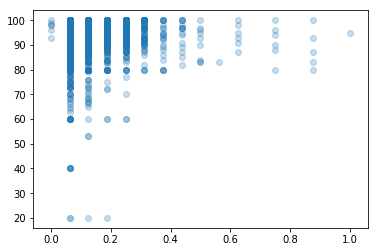

Independent variable: beds, Transrormation: identity


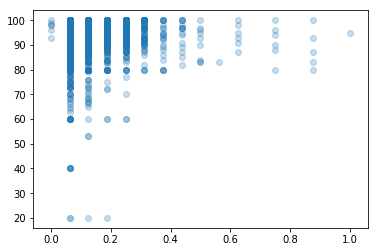

Independent variable: beds, Transrormation: log


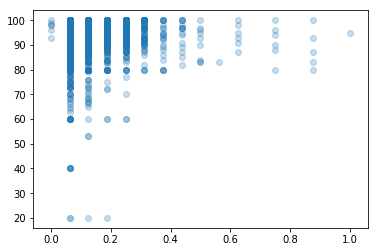

Independent variable: beds, Transrormation: sqrt


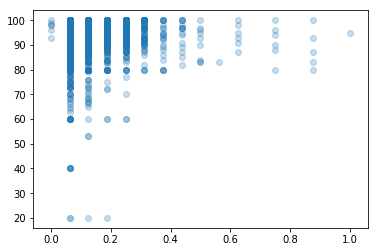

Independent variable: cleaning_fee, Transrormation: exp


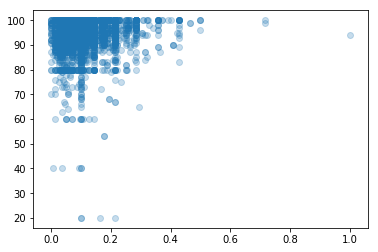

Independent variable: cleaning_fee, Transrormation: identity


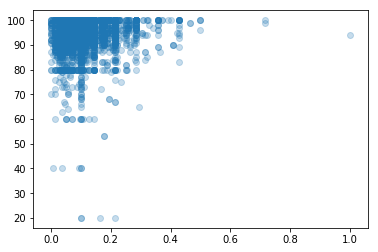

Independent variable: cleaning_fee, Transrormation: log


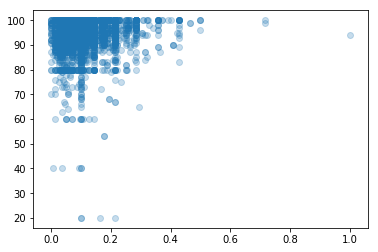

Independent variable: cleaning_fee, Transrormation: sqrt


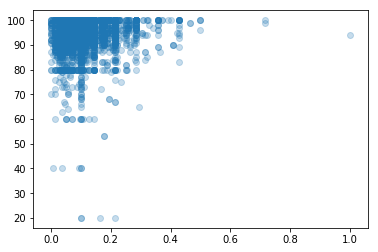

Independent variable: guests_included, Transrormation: exp


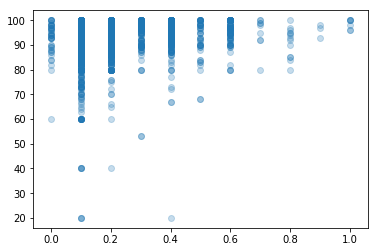

Independent variable: guests_included, Transrormation: identity


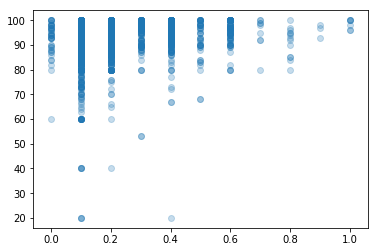

Independent variable: guests_included, Transrormation: log


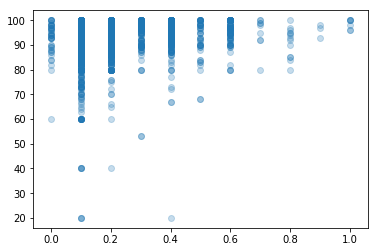

Independent variable: guests_included, Transrormation: sqrt


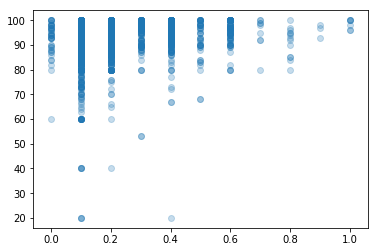

Independent variable: host_listings_count, Transrormation: exp


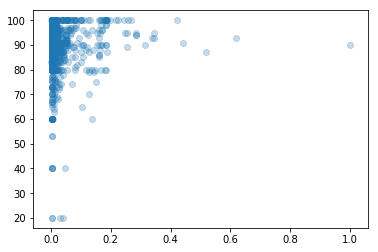

Independent variable: host_listings_count, Transrormation: identity


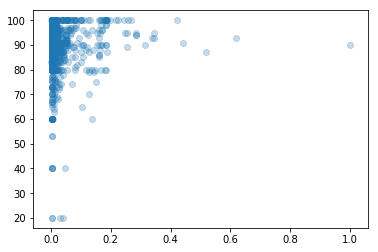

Independent variable: host_listings_count, Transrormation: log


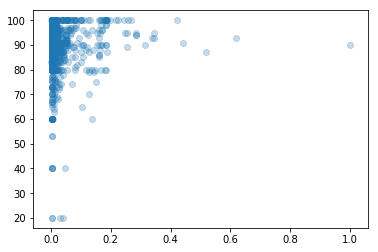

Independent variable: host_listings_count, Transrormation: sqrt


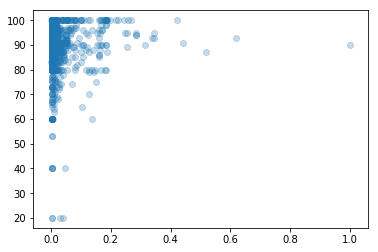

Independent variable: host_acceptance_rate, Transrormation: exp


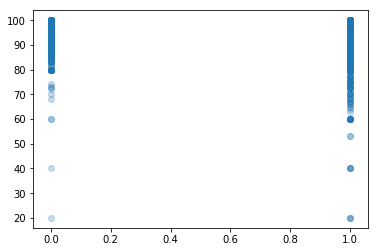

Independent variable: host_acceptance_rate, Transrormation: identity


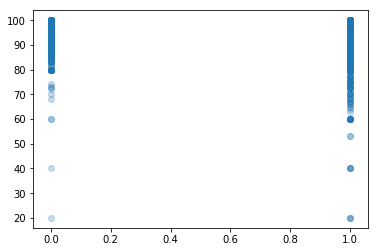

Independent variable: host_acceptance_rate, Transrormation: log


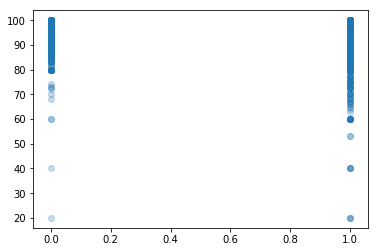

Independent variable: host_acceptance_rate, Transrormation: sqrt


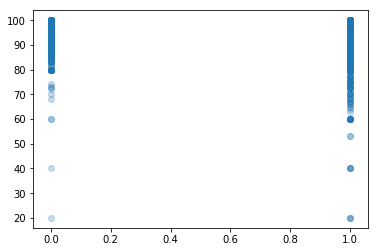

Independent variable: host_response_rate, Transrormation: exp


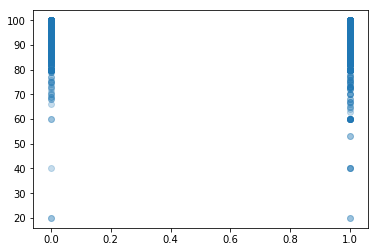

Independent variable: host_response_rate, Transrormation: identity


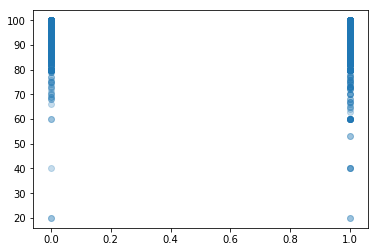

Independent variable: host_response_rate, Transrormation: log


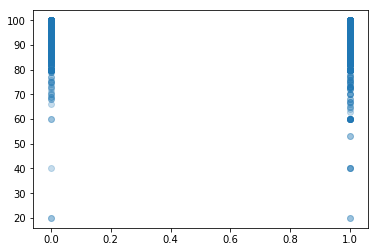

Independent variable: host_response_rate, Transrormation: sqrt


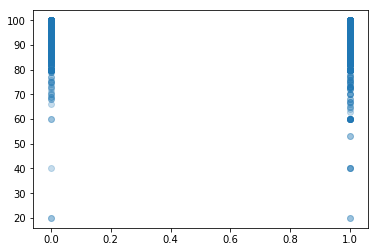

Independent variable: host_has_profile_pic, Transrormation: exp


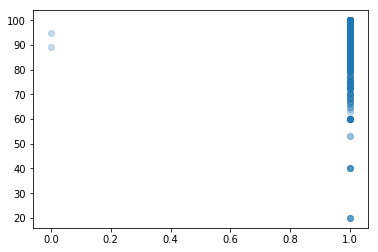

Independent variable: host_has_profile_pic, Transrormation: identity


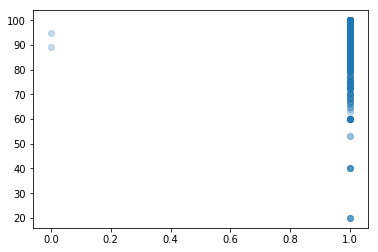

Independent variable: host_has_profile_pic, Transrormation: log


/Users/aysa.fan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


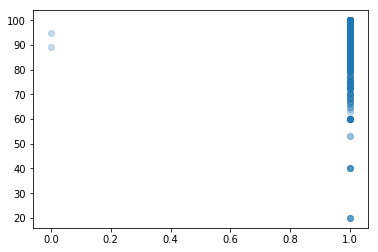

Independent variable: host_has_profile_pic, Transrormation: sqrt


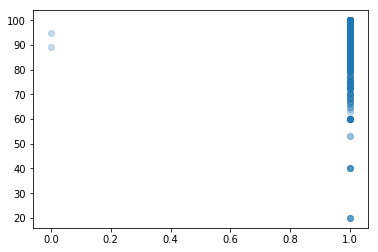

Independent variable: host_identity_verified, Transrormation: exp


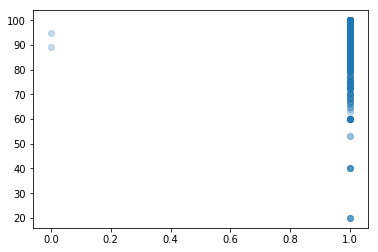

Independent variable: host_identity_verified, Transrormation: identity


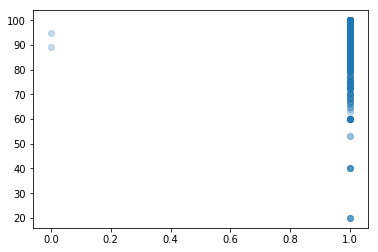

Independent variable: host_identity_verified, Transrormation: log


/Users/aysa.fan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


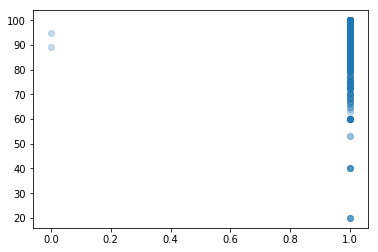

Independent variable: host_identity_verified, Transrormation: sqrt


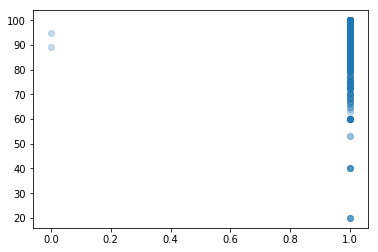

Independent variable: days_delta, Transrormation: exp


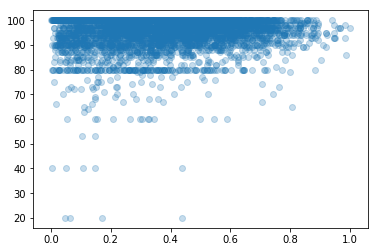

Independent variable: days_delta, Transrormation: identity


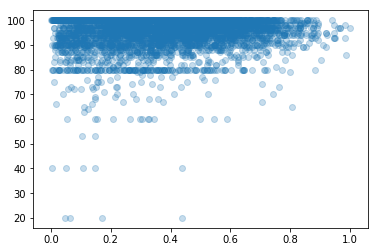

Independent variable: days_delta, Transrormation: log


/Users/aysa.fan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


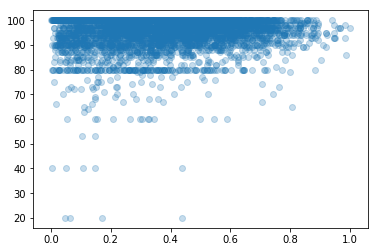

Independent variable: days_delta, Transrormation: sqrt


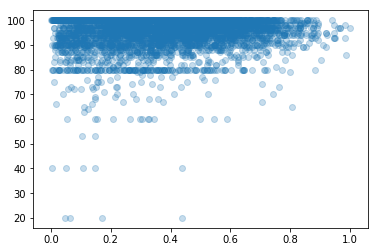

Independent variable: reviews_per_month, Transrormation: exp


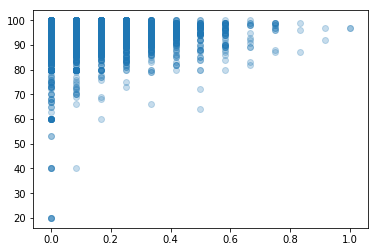

Independent variable: reviews_per_month, Transrormation: identity


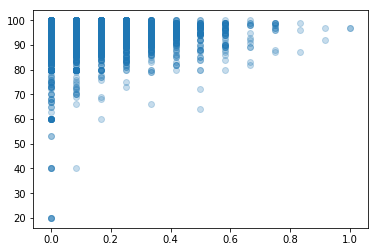

Independent variable: reviews_per_month, Transrormation: log


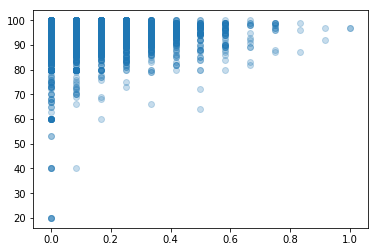

Independent variable: reviews_per_month, Transrormation: sqrt


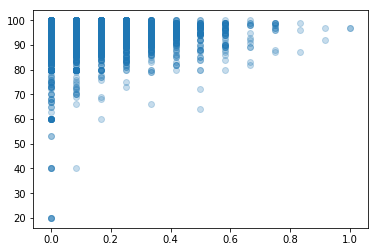

Independent variable: bedrooms_by_beds, Transrormation: exp


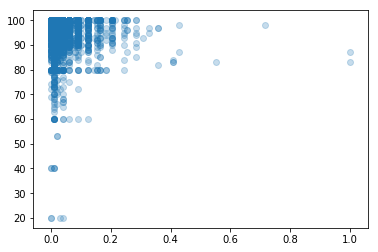

Independent variable: bedrooms_by_beds, Transrormation: identity


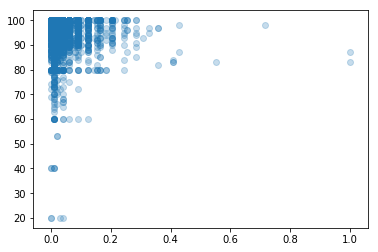

Independent variable: bedrooms_by_beds, Transrormation: log


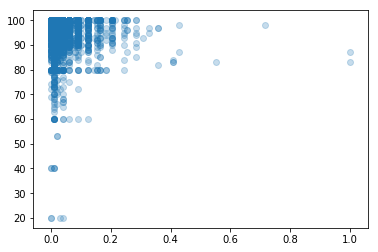

Independent variable: bedrooms_by_beds, Transrormation: sqrt


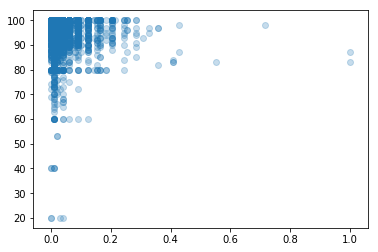

Independent variable: beds_by_guests_included, Transrormation: exp


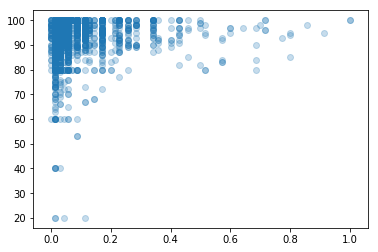

Independent variable: beds_by_guests_included, Transrormation: identity


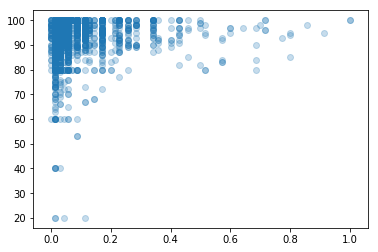

Independent variable: beds_by_guests_included, Transrormation: log


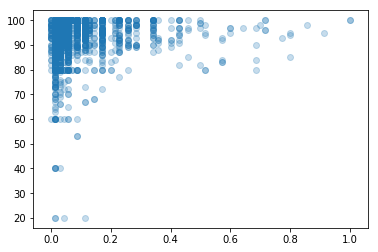

Independent variable: beds_by_guests_included, Transrormation: sqrt


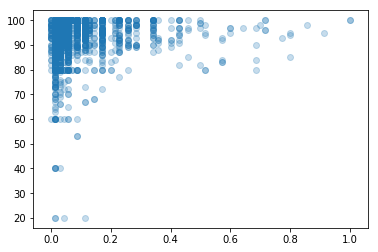

Independent variable: bathrooms_by_guests_included, Transrormation: exp


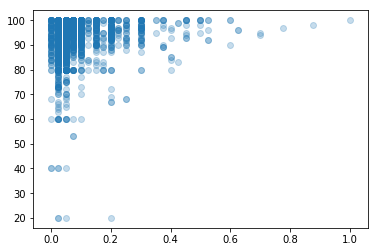

Independent variable: bathrooms_by_guests_included, Transrormation: identity


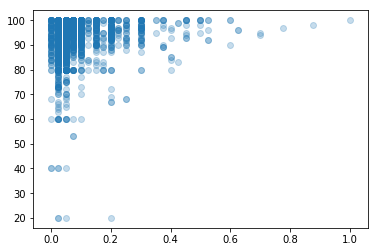

Independent variable: bathrooms_by_guests_included, Transrormation: log


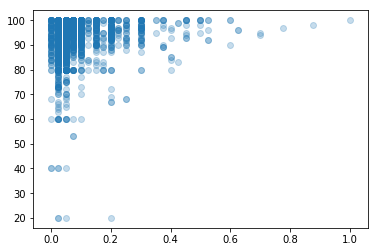

Independent variable: bathrooms_by_guests_included, Transrormation: sqrt


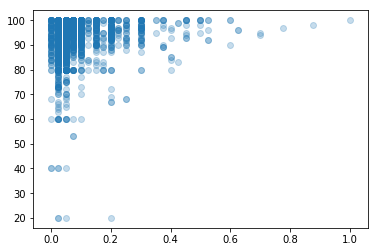

Independent variable: cleaning_fee_by_guests_included, Transrormation: exp


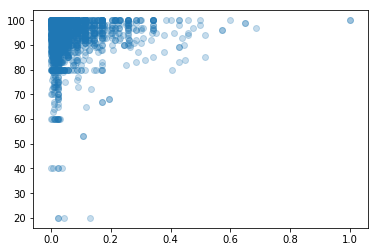

Independent variable: cleaning_fee_by_guests_included, Transrormation: identity


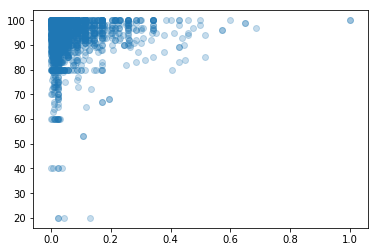

Independent variable: cleaning_fee_by_guests_included, Transrormation: log


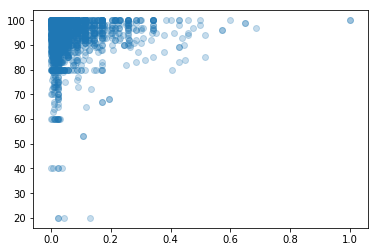

Independent variable: cleaning_fee_by_guests_included, Transrormation: sqrt


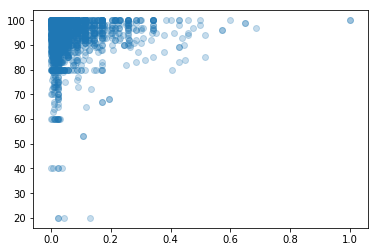

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: exp


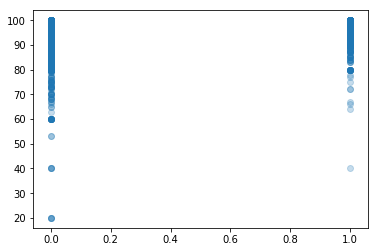

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: identity


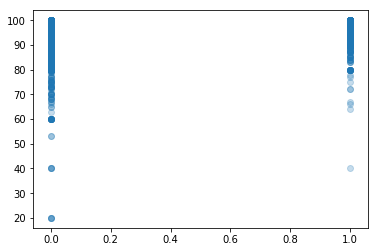

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: log


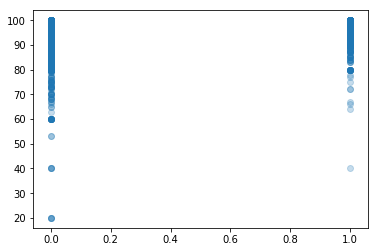

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: sqrt


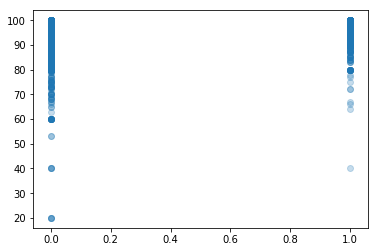

In [17]:
func_dict = {
    'identity': lambda x: x, 
    'sqrt': np.sqrt, 
    'log': np.log, 
    'exp': np.exp, 
}

def standard_scale(x):
    return [(i - np.mean(x)) / np.std(x) for i in x]

def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

y_vals = data[dependent_variable].fillna(data[dependent_variable].median())
for c in data.columns:
    if c in ['id', dependent_variable]:
        continue 
    for k in sorted(func_dict.keys()):
        print ('Independent variable: %s, Transrormation: %s' % (c, k))
        x_vals = normalize_df(data[c].fillna(data[c].median()).astype(int))
        x_cvals = func_dict[k](x_vals)
        plt.scatter(x_vals, y_vals, alpha=0.25)
        plt.show()

There's no obvious reltionship between the dependent and independent variables. Let's try some interactions with features.

# Create feature interactions

1. bathrooms x bedrooms
2. bedrooms x beds
3. beds x guests_included
4. bathrooms x guests_included
5. host_acceptance_rate x host_response_rate


In [18]:
def create_interaction(f1, f2, intyp):
    if 'D' == intype:
        return f1 / f2
    if 'A' == intype:
        return f1 + f2
    if 'S' == intype:
        return f1 - f2
    
    # Mulitply the features by default
    return f1 * f2

def get_interacted_dataset(ds, interactions_dict, drop=False):
    col_names = []
    for k, v in interactions_dict.items():
        colname = k+'_by_'+v[0]
        ds[colname] = ds[k] * ds[v[0]]
        col_names.append(colname)
        
    if drop:
        for k in interactions_dict.keys():
            ds = ds.drop(k, axis=1)
    
    return col_names, ds


inter_dct = {
    'bedrooms': ('bathrooms', 'M'), 
    'bedrooms': ('beds', 'M'), 
    'beds': ('guests_included', 'M'), 
    'bathrooms': ('guests_included', 'M'), 
    'cleaning_fee': ('guests_included', 'D'), 
    'host_acceptance_rate': ('host_response_rate', 'D')
}

col_names, data = get_interacted_dataset(data, inter_dct, drop=False)

# Run EDA with interacted features

Independent variable: bedrooms_by_beds, Transrormation: exp


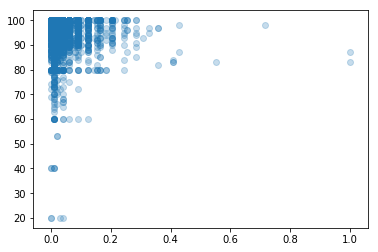

Independent variable: bedrooms_by_beds, Transrormation: identity


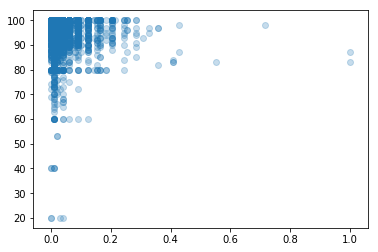

Independent variable: bedrooms_by_beds, Transrormation: log


/Users/aysa.fan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


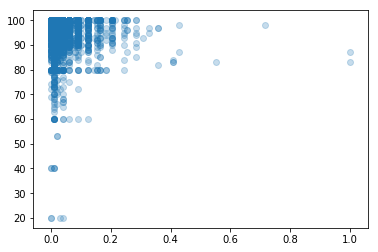

Independent variable: bedrooms_by_beds, Transrormation: sqrt


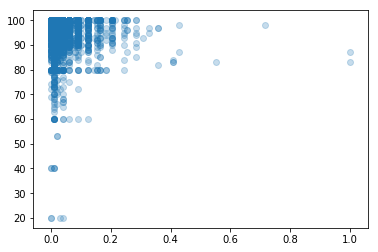

Independent variable: beds_by_guests_included, Transrormation: exp


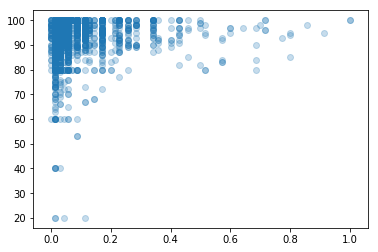

Independent variable: beds_by_guests_included, Transrormation: identity


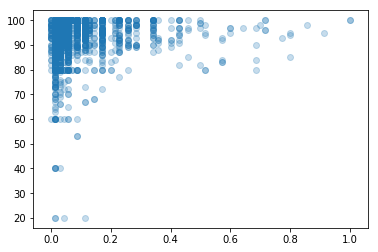

Independent variable: beds_by_guests_included, Transrormation: log


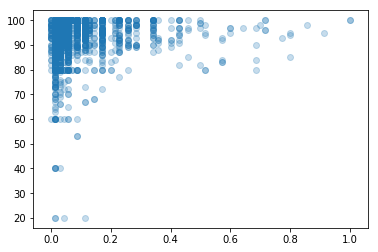

Independent variable: beds_by_guests_included, Transrormation: sqrt


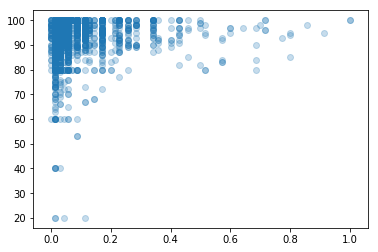

Independent variable: bathrooms_by_guests_included, Transrormation: exp


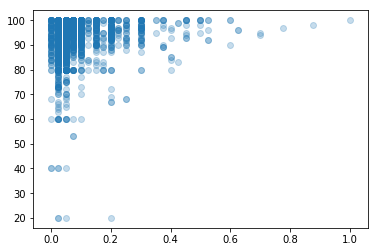

Independent variable: bathrooms_by_guests_included, Transrormation: identity


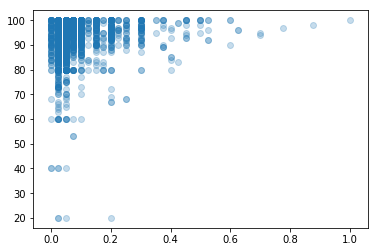

Independent variable: bathrooms_by_guests_included, Transrormation: log


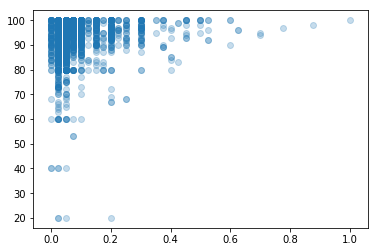

Independent variable: bathrooms_by_guests_included, Transrormation: sqrt


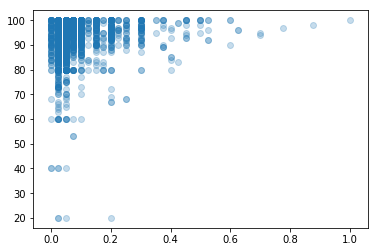

Independent variable: cleaning_fee_by_guests_included, Transrormation: exp


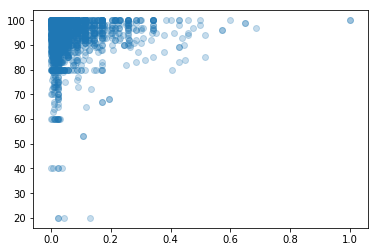

Independent variable: cleaning_fee_by_guests_included, Transrormation: identity


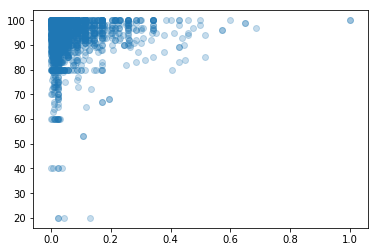

Independent variable: cleaning_fee_by_guests_included, Transrormation: log


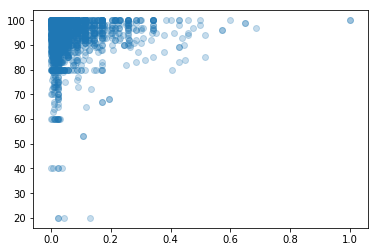

Independent variable: cleaning_fee_by_guests_included, Transrormation: sqrt


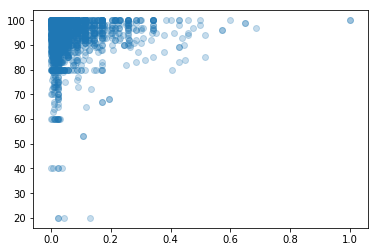

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: exp


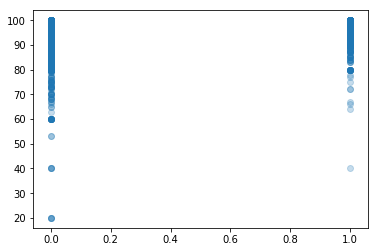

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: identity


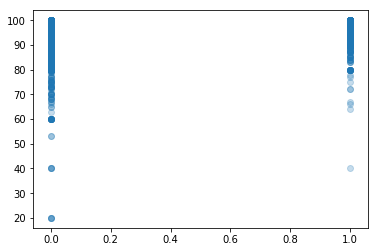

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: log


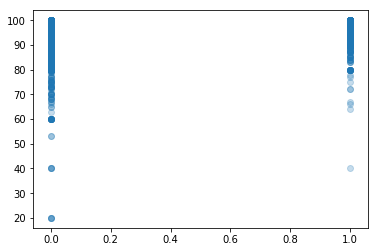

Independent variable: host_acceptance_rate_by_host_response_rate, Transrormation: sqrt


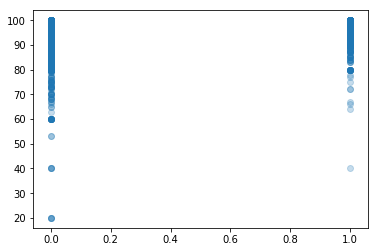

In [19]:
y_vals = data[dependent_variable].fillna(data[dependent_variable].median())
for c in col_names:
    for k in sorted(func_dict.keys()):
        print ('Independent variable: %s, Transrormation: %s' % (c, k))
        x_vals = normalize_df(data[c].fillna(data[c].median()).astype(int))
        x_cvals = func_dict[k](x_vals)
        plt.scatter(x_vals, y_vals, alpha=0.25)
        plt.show()

No obvious relationship here either. See which features are important next, using a regression.

# Rank features by importance using regression

/Users/aysa.fan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Feature ranking: 
#1. bathrooms 10 (0.193220)
#2. bedrooms 11 (0.160392)
#3. beds 5 (0.100343)
#4. cleaning_fee 3 (0.093420)
#5. guests_included 15 (0.079303)
#6. host_listings_count 0 (0.049191)
#7. host_acceptance_rate 16 (0.046629)
#8. host_response_rate 1 (0.046059)
#9. host_has_profile_pic 7 (0.044165)
#10. host_identity_verified 14 (0.037658)
#11. days_delta 12 (0.037391)
#12. reviews_per_month 13 (0.032762)
#13. bedrooms_by_beds 6 (0.028103)
#14. beds_by_guests_included 2 (0.026542)
#15. bathrooms_by_guests_included 4 (0.024628)
#16. cleaning_fee_by_guests_included 9 (0.000098)
#17. host_acceptance_rate_by_host_response_rate 8 (0.000095)


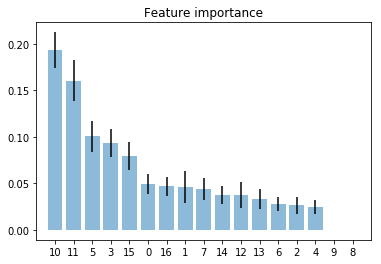

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

forest = ExtraTreesRegressor(n_estimators=250, random_state=1234)

y_train = data[[dependent_variable]]
X_train = data.drop([dependent_variable], axis=1).fillna(data.median())
forest.fit(X_train, y_train)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], 
             axis=0)

indices = np.argsort(importances)[::-1]

print ('Feature ranking: ')
for f, c in zip(range(X_train.shape[1]), X_train.columns):
    print ('#%d. %s %d (%f)' % (f+1, c, indices[f], 
                               importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")

plt.bar(range(X_train.shape[1]), importances[indices], 
        yerr=std[indices], align="center", alpha=0.5)
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Create the Processed dataset

In order to create the processed dataset, here's what we will do:
1. Load all the numeric data
2. Split the data into Training and Test sets using random indexes
3. Process the data 
4. Save the Processed into csv files

In [21]:
# Combine all the data

dependent_variable = 'review_scores_rating'

# Select the independent variables and get a combined dataset
data = pd.concat([num_data, 
                  bool_data[['host_has_profile_pic', 'host_identity_verified']], 
                  date_data[['days_delta']], 
                  reviews_data[['reviews_per_month', dependent_variable]]], axis=1)

# Drop Id column for now
data = data.drop('id', axis=1)

print (data.shape)
print (data.columns)

# Drop missing values from depedent variable
data = data.dropna(subset=[dependent_variable])

data.sample(1)

(243721, 13)
Index(['bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included',
       'host_listings_count', 'host_acceptance_rate', 'host_response_rate',
       'host_has_profile_pic', 'host_identity_verified', 'days_delta',
       'reviews_per_month', 'review_scores_rating'],
      dtype='object')


,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,host_acceptance_rate,host_response_rate,host_has_profile_pic,host_identity_verified,days_delta,reviews_per_month,review_scores_rating
238815,1.0,1.0,1.0,30.0,1.0,2.0,NaN,1.0,True,True,199.0,2.4,93.0


# Split data into Train and Test sets

Before preprocessing data, we need split it into Train and Test sets. Once split, we will impute missing values using Median. And finally, we will drop the outliers as mentioned in the Takeaways section. This sequence is important because we have a ton of missing values, and we'd be left with a tiny dataset if we dropped outliers before imputing missing values.

In [22]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(data, test_size=0.33, random_state=1234)

print (Train.shape)
print (Test.shape)

(127302, 13)
(62702, 13)


# Impute missing values for Train and Test sets
We will use Median for imputing missing values because it is not as affected by outliers as the Mean.
We will train the Imputer on the training data, and use this to fill the values for both Train and Test sets. 
We will not train a new Imputer on test data. This is important because we do not want to look at the test data when imputing the values.

In [23]:
# Impute missing values using median for both independent and dependent variables
# We don't care for host_has_profile_pic, and host_identity_verified.
# We dropped missing values from our dependent variable earlier, 
# so it won't be affected by imputation here.

import numpy as np
from sklearn.preprocessing import Imputer

# We need the 
train_colnames = Train.columns
# print train_colnames

# Train data first
# axis 0 means impute along columns
train_imp = Imputer(missing_values=np.nan, strategy='median', axis=0, copy=True)
train_imp.fit(Train)
Train = train_imp.transform(Train)


# Then Test data
test_colnames = Test.columns
# print test_colnames
Test = train_imp.transform(Test)

print (Train.shape)
print (Test.shape)

(127302, 13)
(62702, 13)


# Handle Outliers
Drop them from the Training and Test data, as discussed in the Takeaways section.

In [24]:
# We need DataFrames here because we're lazy
Train = pd.DataFrame(Train, columns=train_colnames)
Train.sample()
Test = pd.DataFrame(Test, columns=test_colnames)
Test.sample()

def drop_outliers(t):
    # Drop outliers from dependent variable
    h = 0
    if 'review_scores_value' == dependent_variable:
        h = 3
    elif 'review_scores_rating' == dependent_variable:
        h = 80
    t = t.loc[t[dependent_variable] >= h]
    
    # Remove reviews_per_month == 0
    t = t.loc[t.reviews_per_month > 0].astype(float)

    # 1. Remove 'bathrooms' >= 5, convert to int
    t = t.loc[t.bathrooms < 5]
    t.bathrooms = t.bathrooms.astype(int)

    # 2. Remove 'bedrooms' > 5, convert to int
    t = t.loc[t.bedrooms <= 5]
    t.bedrooms = t.bedrooms.astype(int)

    # 3. Remove 'beds' >= 8, convert to int
    t = t.loc[t.beds < 8]
    t.beds = t.beds.astype(int)

    # 4. Remove 'cleaning_fee' > 400
    t = t.loc[t.cleaning_fee <= 400]

    # 5. Remove 'guests_included' > 8
    t = t.loc[t.guests_included <= 8]
    t = t.loc[t.guests_included > 0]
    t.guests_included = t.guests_included.astype(int)

    # 6. Remove 'host_listings_count' > 100
    t = t.loc[t.host_listings_count <= 100]
    # Remove'host_listings_count' <= 0
    t = t.loc[t.host_listings_count > 0]
    t.host_listings_count = t.host_listings_count.astype(int)
    
    

    # 7. Remove 'host_acceptance_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 8. Remove 'host_response_rate' == 0.
    t = t.loc[t.host_acceptance_rate > 0.]

    # 9. Remove 'reviews_per_month' > 12.
    t = t.loc[t.reviews_per_month <= 12]

    # 10. Drop 'host_has_profile_pic'
    # t = t.drop('host_has_profile_pic', axis=1)

    # 11. Drop 'host_identity_verified'
    # t = t.drop('host_identity_verified', axis=1)
    
    return t

Train = drop_outliers(Train)
Test = drop_outliers(Test)

print (Train.shape)
print (Test.shape)

(119615, 13)
(58911, 13)


# Separate the Dependent and Independet Variables

In [25]:
# Train data
y_train = Train[dependent_variable]
print (y_train.shape)

X_train = Train.drop([dependent_variable], axis=1)
print (X_train.shape)

# Test data
y_test = Test[dependent_variable]
print (y_test.shape)

X_test = Test.drop([dependent_variable], axis=1)
print (X_test.shape)

(119615,)
(119615, 12)
(58911,)
(58911, 12)


# Normalize the Training and Test Data

In [26]:
def normalize_df(df):
    return (df - df.min()) / (df.max() - df.min())

X_train = normalize_df(X_train)
print (X_train.shape)

X_test = normalize_df(X_test)
print (X_test.shape)

(119615, 12)
(58911, 12)


# Scale the Dependent variables
We don't want any one variable dominating others in the regression model, so let's start by scaling the dependent variables. As with Imputation, we will train the scaler only on the training data (to learn the mean and standard deviation), and then use it as-is on the Test data. We will assume that all dependent variables are interval.

In [27]:
# Scale the data

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='uniform') # output distribution: 'uniform', or 'normal'
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print (X_train.shape)

X_test = scaler.transform(X_test)
print (X_test.shape)

(119615, 12)
(58911, 12)


# Convert X_train and X_test back to Pandas Dataframe

In [28]:
X_train = pd.DataFrame(X_train, columns=[c for c in train_colnames if c != dependent_variable])
print (X_train.shape)

y_train = pd.DataFrame(y_train, columns=[dependent_variable])
print (y_train.shape)

X_test = pd.DataFrame(X_test, columns=[c for c in test_colnames if c != dependent_variable])
print (X_test.shape)

y_test = pd.DataFrame(y_test, columns=[dependent_variable])

(119615, 12)
(119615, 1)
(58911, 12)


In [29]:
# Write processed train data to csv
X_train.to_csv('./data/numeric_train_deps.csv', encoding='utf8')
y_train.to_csv('./data/numeric_train_indeps.csv', encoding='utf8')

# Write processed test data to csv
X_test.to_csv('./data/numeric_test_deps.csv', encoding='utf8')
y_test.to_csv('./data/numeric_test_indeps.csv', encoding='utf8')